<a href="https://www.kaggle.com/code/manarahs/preprocessing-task?scriptVersionId=119769516" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import random
import matplotlib.pyplot as plt
import os
import dlib


In [2]:
train_data= "/kaggle/input/autism-image-data/AutismDataset/train"
test_data= "/kaggle/input/autism-image-data/AutismDataset/test"
validation_autistic= "/kaggle/input/autism-image-data/AutismDataset/valid/Autistic"
validation_nonautistic= "/kaggle/input/autism-image-data/AutismDataset/valid/Non_Autistic"

In [3]:
Nonautistic_train = []
autistic_train = []

for i in os.listdir(train_data):
    if 'non_autistic' in ("../input/autism-image-data/AutismDataset/train/{}".format(i)):
        Nonautistic_train.append(("../input/autism-image-data/AutismDataset/train/{}".format(i)))
    else:
        autistic_train.append(("../input/autism-image-data/AutismDataset/train/{}".format(i)))
        

test_imgs = ["../input/autism-image-data/AutismDataset/test/{}".format(i) for i in os.listdir(test_data)]

valid_autistic = ["/kaggle/input/autism-image-data/AutismDataset/valid/Autistic/{}".format(i) for i in os.listdir(validation_autistic)]
valid_nonautistic = ["/kaggle/input/autism-image-data/AutismDataset/valid/Non_Autistic/{}".format(i) for i in os.listdir(validation_nonautistic)]        


training_data = autistic_train + Nonautistic_train
valids = valid_autistic + valid_nonautistic

#random.shuffle(training_data)
#random.shuffle(valids)


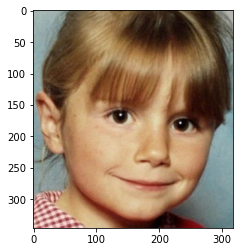

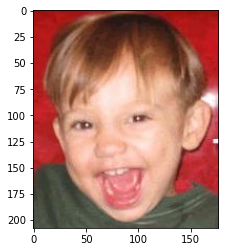

In [4]:
sample2=[]
def sampledata():
    for i in training_data[0:2]:
        img=cv2.imread(i)
        sample=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgplot = plt.imshow(sample)
        plt.show()
        sample2.append(sample)
    return sample2
sample_data=sampledata()


**main pipeline =cropping based detection and resize**

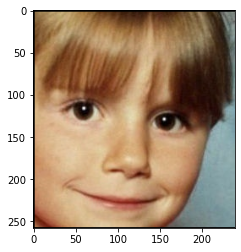

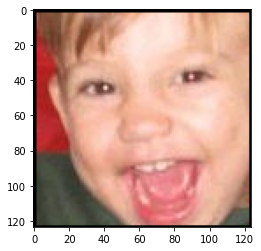

In [5]:
detectedimages=[]
def cropping_based_face_detection(samdata): 
    detector = dlib.get_frontal_face_detector()
    greyimg=cv2.cvtColor(samdata, cv2.COLOR_BGR2GRAY)
    detectedimg = detector(greyimg)
    #print("found {} face(s)".format(len(detectedimg)))
    for face in detectedimg:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()
        img=cv2.rectangle(samdata, (x1, y1), (x2, y2), (0, 0, 0), 2)
        #imgplot = plt.imshow(img)
        #plt.show()
        cropped=img[face.top():face.bottom(),face.left():face.right()]
        imgplot = plt.imshow(cropped)
        plt.show()
    detectedimages.append(cropped)
    return detectedimages

for i in sample_data:
    det_img=cropping_based_face_detection(i)

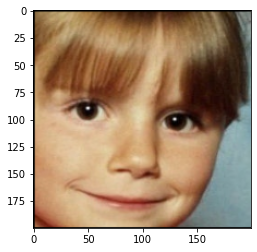

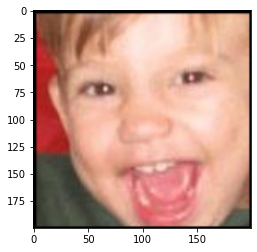

In [6]:
resizedimg=[]
def ReSize(detimg):
    img=cv2.resize(detimg,(200,200))
    imgplot = plt.imshow(img)
    plt.show()
    resizedimg.append(img)
    return resizedimg

for i in det_img:
    res_img=ReSize(i)
    

**+grey**

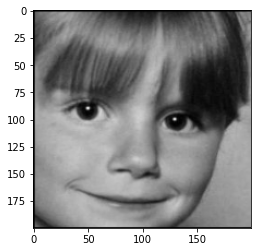

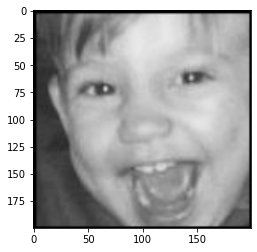

In [7]:
grey=[]
def gray(resimg):
    img=cv2.cvtColor(resimg, cv2.COLOR_BGR2GRAY)
    I=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(I)
    plt.show()
    grey.append(I)
    return grey

for i in res_img:
    grey_img=gray(i)   
    

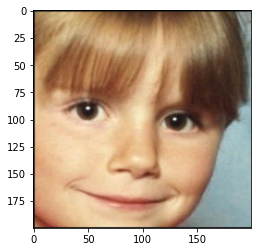

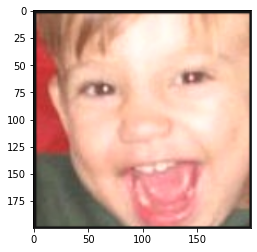

In [8]:
bc=[]
def Brightnessandcontrast(resimg):
    Bright = 20
    Contrast = 1
    img=cv2.cvtColor(resimg,cv2.COLOR_BGR2RGB)
    adjusted = cv2.convertScaleAbs(img, alpha=Contrast, beta=Bright)
    rgbadjusted=cv2.cvtColor(adjusted,cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(rgbadjusted)
    plt.show()
    bc.append(rgbadjusted)
    return bc

for i in res_img:
    b_c=Brightnessandcontrast(i)

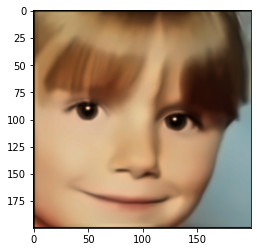

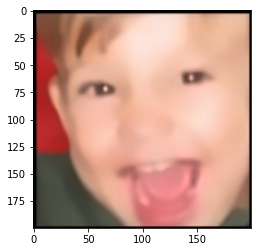

In [9]:
blurred=[]
def noise_reduction(resimg):
    img=cv2.cvtColor(resimg,cv2.COLOR_BGR2RGB)
    filteredimg = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    rgbfilteredimg=cv2.cvtColor(filteredimg,cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(rgbfilteredimg)
    plt.show()
    blurred.append(rgbfilteredimg)
    return blurred

for i in res_img:
    blur_img=noise_reduction(i)
    